<h1> Projeto de Análise de Consumidores da Loja Starbucks </h1>
<br>
    Esta apresentação foi criada por Juliana Mendes, com informações contidas em uma base de dados, do site Kaggle, você poderá baixa-lá no repositório.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

<b> Orientações do projeto: 
    
I.Tratamento dos dados
    
II.Análise exploratória dos dados
    
III.Desafios do projeto

In [7]:
#Tratamento dos dados

db= pd.read_csv('Starbucks satisfactory survey.csv', sep=',')
#transformando nomes de colunas
 db.columns= ['time','sex','age','job','wage','oft','how','stay','dist','card','prod','spend','quali','price','promo','place','wifi','rate','party','media','buyer']

#Valor Gasto
db.loc[db['spend'] ==  'Less than RM20', 'spend'] = 15
db.loc[db['spend'] ==  'Around RM20 - RM40', 'spend'] = 30
db.loc[db['spend'] ==  'Zero', 'spend'] = 0
db.loc[db['spend'] ==  'More than RM40', 'spend'] = 55

#transform wage
db.loc[db['wage'] ==  'Less than RM25,000', 'wage'] = 20000
db.loc[db['wage'] ==  'RM25,000 - RM50,000', 'wage'] = 35000
db.loc[db['wage'] ==  'More than RM150,000', 'wage'] = 160000
db.loc[db['wage'] ==  'RM100,000 - RM150,000', 'wage'] = 125000
db.loc[db['wage'] ==  'RM50,000 - RM100,000', 'wage'] = 75000
#stay time
db.loc[db['stay'] ==  'Below 30 minutes', 'stay'] = 25
db.loc[db['stay'] ==  'Between 30 minutes to 1 hour', 'stay'] = 45
db.loc[db['stay'] ==  'Between 1 hour to 2 hours', 'stay'] = 90
db.loc[db['stay'] ==  'More than 3 hours', 'stay'] = 190
db.loc[db['stay'] ==  'Between 2 hours to 3 hours', 'stay'] = 150

db['stay'] = db['stay'].astype('int64')
db['spend'] = db['spend'].astype('int64')
db['wage'] = db['wage'].astype('int64')
db['spend'] = db['spend'].astype('int64')

IndentationError: unexpected indent (<ipython-input-7-efd73aac74b2>, line 5)

In [4]:
sex =db['sex'].value_counts()
sex.plot.bar(color = ['pink','blue'], label= True)
print(sex)

NameError: name 'db' is not defined

<i> Total de intrevistados 122 pessoas

<b>
1) O que vocÊ faz?


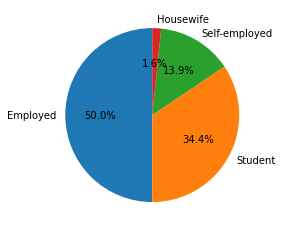

In [9]:
#Profissão dos entrevistados

labels= 'Employed','Student','Self-employed','Housewife'
size= [61,42,17,2]
fig1,ax1= plt.subplots()
fig1,ax1.pie(size, labels=labels, autopct='%1.1f%%',
 shadow= False, startangle=90)
plt.show()


<b>
b) Quanto consome cada grupo?


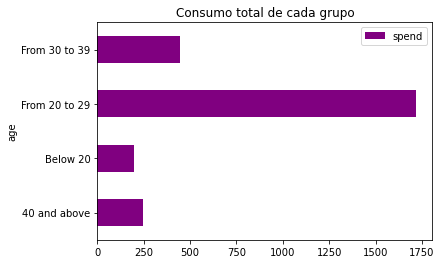

In [10]:
age_spend = db[['age','spend']].groupby('age').sum()
age_spend.plot.barh(color = 'purple')
plt.title('Consumo total de cada grupo')
plt.show()

Como podemos ver, temos um grupo(from 20 to 29) onde se concentra o maior lucro dessa loja


<b>
c) Qual sua frequência no Starbucks? 


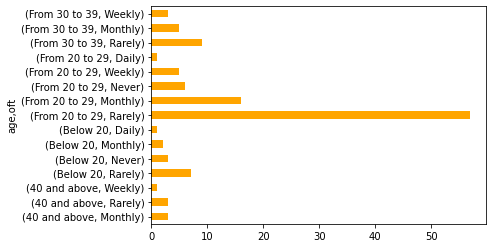

age            oft    
40 and above   Monthly     3
               Rarely      3
               Weekly      1
Below 20       Rarely      7
               Never       3
               Monthly     2
               Daily       1
From 20 to 29  Rarely     57
               Monthly    16
               Never       6
               Weekly      5
               Daily       1
From 30 to 39  Rarely      9
               Monthly     5
               Weekly      3
Name: oft, dtype: int64


In [11]:
age_oft = db.groupby('age')['oft'].value_counts()
age_oft.plot.barh( color='orange')
plt.show()
print(age_oft)

<i>
 Insights:
<br>
O total de clientes que mais consomem na loja: 79 pessoas, pertencem a faixa etária: 20 a 29 anos.
Consomem em media 22,50 por pessoa.
    
    





<b>III. Desafios do projeto:
    
I) Apontar soluções para aumentar a assiduidade da maior classe consumidora.

II)Apresentar propostas para aumentar a frequencia e consumo do grupo de cliente entre 30 e 39 anos

<b> Quem ganha mais?

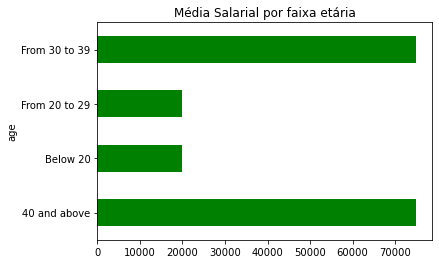

In [12]:
age_wage = db.groupby('age')['wage'].median()
age_wage.plot.barh(color = 'green')
plt.title('Média Salarial por faixa etária')
plt.show()

In [13]:
#tranformar age em numeros
db.loc[db['age'] ==  'From 20 to 29', 'age'] = 25
db.loc[db['age'] ==  'From 30 to 39', 'age'] = 35
db.loc[db['age'] ==  'From 20 to 29', 'age'] = 25
db.loc[db['age'] ==  'Below 20', 'age'] = 16
db.loc[db['age'] ==  '40 and above', 'age'] = 55
db['age'] = db['age'].astype('int64')

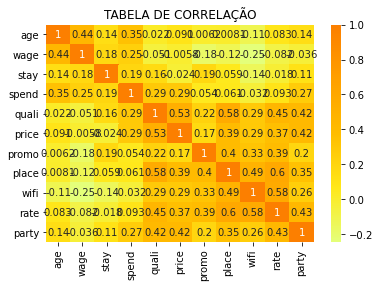

In [14]:
sns.heatmap(db.corr(), annot=True, cmap="Wistia")

plt.title('TABELA DE CORRELAÇÃO')
plt.show()

<i> Existe uma relação significativa entre (rating- place) e (rating - wifi), vamos ver se isso está influenciando no nivel de satisfalçao dos intrevistados.
    

In [15]:
db.loc[(db['oft'] == 'Rarely') & (db['price'] <3)]

,time,sex,age,job,wage,oft,how,stay,dist,card,...,spend,quali,price,promo,place,wifi,rate,party,media,buyer
3,2019/10/01 12:39:08 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,2,1,4,3,3,3,3,Through friends and word of mouth,No
7,2019/10/01 12:40:58 PM GMT+8,Male,25,Employed,75000,Rarely,Dine in,45,more than 3km,Yes,...,15,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
10,2019/10/01 12:47:00 PM GMT+8,Female,25,Student,20000,Rarely,Dine in,25,more than 3km,No,...,15,4,1,4,5,3,3,4,Social Media,Yes
11,2019/10/01 12:48:26 PM GMT+8,Female,25,Student,20000,Rarely,Dine in,45,more than 3km,No,...,15,3,2,4,4,3,4,4,Starbucks Website/Apps;Social Media;Through fr...,No
14,2019/10/01 12:53:16 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,within 1km,Yes,...,15,5,2,5,5,5,5,2,Social Media;Through friends and word of mouth...,No
15,2019/10/01 12:57:31 PM GMT+8,Female,25,Employed,20000,Rarely,Take away,45,more than 3km,Yes,...,15,4,1,5,4,3,4,4,Starbucks Website/Apps,No
20,2019/10/01 1:13:45 PM GMT+8,Male,35,Employed,125000,Rarely,Take away,25,within 1km,Yes,...,30,2,2,5,3,3,4,3,Social Media;Emails,No
22,2019/10/01 1:21:50 PM GMT+8,Male,25,Employed,35000,Rarely,Dine in,190,within 1km,No,...,15,5,2,5,5,2,4,3,Through friends and word of mouth,No
26,2019/10/01 1:29:11 PM GMT+8,Male,35,Employed,160000,Rarely,Drive-thru,25,1km - 3km,No,...,15,4,2,4,4,4,4,2,Application offer,No
33,2019/10/01 1:45:43 PM GMT+8,Female,25,Employed,35000,Rarely,Dine in,45,1km - 3km,Yes,...,15,3,2,3,3,3,4,3,Social Media,No


In [16]:
db.loc[(db['oft'] == 'Rarely') & (db['wifi'] <3)]

,time,sex,age,job,wage,oft,how,stay,dist,card,...,spend,quali,price,promo,place,wifi,rate,party,media,buyer
22,2019/10/01 1:21:50 PM GMT+8,Male,25,Employed,35000,Rarely,Dine in,190,within 1km,No,...,15,5,2,5,5,2,4,3,Through friends and word of mouth,No
50,2019/10/01 3:12:11 PM GMT+8,Male,55,Employed,125000,Rarely,Dine in,25,more than 3km,Yes,...,30,4,4,4,4,2,3,4,Social Media;In Store displays,Yes
51,2019/10/01 3:16:32 PM GMT+8,Female,16,Student,20000,Rarely,Dine in,25,more than 3km,No,...,15,3,3,2,2,2,4,3,Social Media;Through friends and word of mouth,No
76,2019/10/02 8:52:13 PM GMT+8,Male,25,Employed,20000,Rarely,Take away,25,1km - 3km,No,...,15,4,2,5,3,2,4,4,Social Media;Emails;Through friends and word o...,Yes
78,2019/10/03 7:19:36 AM GMT+8,Female,25,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,2,1,5,2,2,2,2,Social Media;Through friends and word of mouth,No
79,2019/10/03 7:21:08 AM GMT+8,Female,16,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,2,2,3,2,2,2,2,"Social Media;Deal sites (fave, iprice, etc...)",No
86,2019/10/03 11:18:48 AM GMT+8,Male,25,Self-employed,160000,Rarely,Drive-thru,45,more than 3km,Yes,...,55,4,3,2,3,1,2,2,Social Media;Through friends and word of mouth,Yes
101,2019/10/03 6:31:44 PM GMT+8,Male,25,Student,20000,Rarely,Dine in,45,more than 3km,No,...,15,3,4,3,3,1,2,3,Through friends and word of mouth,Yes
114,2019/10/03 9:25:36 PM GMT+8,Male,55,Self-employed,35000,Rarely,Dine in,45,more than 3km,No,...,15,2,2,1,2,2,3,2,In Store displays,No


<b>Insights

<i> Note-se que que a Moda, na variávei wifi é 3, relativamente uma pontuação baixa
    
Price recebe uma pontuação baixa entre aqueles cujo salário é 20.000


In [17]:
db.loc[(db['wage'] == 20000) & (db['price'] <3)]

,time,sex,age,job,wage,oft,how,stay,dist,card,...,spend,quali,price,promo,place,wifi,rate,party,media,buyer
3,2019/10/01 12:39:08 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,2,1,4,3,3,3,3,Through friends and word of mouth,No
10,2019/10/01 12:47:00 PM GMT+8,Female,25,Student,20000,Rarely,Dine in,25,more than 3km,No,...,15,4,1,4,5,3,3,4,Social Media,Yes
11,2019/10/01 12:48:26 PM GMT+8,Female,25,Student,20000,Rarely,Dine in,45,more than 3km,No,...,15,3,2,4,4,3,4,4,Starbucks Website/Apps;Social Media;Through fr...,No
14,2019/10/01 12:53:16 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,within 1km,Yes,...,15,5,2,5,5,5,5,2,Social Media;Through friends and word of mouth...,No
15,2019/10/01 12:57:31 PM GMT+8,Female,25,Employed,20000,Rarely,Take away,45,more than 3km,Yes,...,15,4,1,5,4,3,4,4,Starbucks Website/Apps,No
35,2019/10/01 1:51:56 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,4,2,4,4,3,4,1,Social Media,No
37,2019/10/01 1:55:52 PM GMT+8,Male,16,Student,20000,Rarely,Dine in,90,more than 3km,No,...,15,5,2,3,4,4,3,5,Starbucks Website/Apps;Social Media,Yes
46,2019/10/01 2:41:56 PM GMT+8,Female,16,Student,20000,Never,Dine in,25,more than 3km,No,...,15,3,2,5,4,3,3,5,Through friends and word of mouth,Yes
47,2019/10/01 2:42:02 PM GMT+8,Female,25,Self-employed,20000,Rarely,Take away,45,more than 3km,No,...,0,3,1,5,4,3,3,2,"Social Media;Emails;Deal sites (fave, iprice, ...",Yes
60,2019/10/01 8:32:12 PM GMT+8,Male,25,Student,20000,Rarely,Dine in,90,1km - 3km,Yes,...,55,2,1,5,1,4,3,3,Social Media,Yes


<b> Cartão Fidelidade Starbucks
    

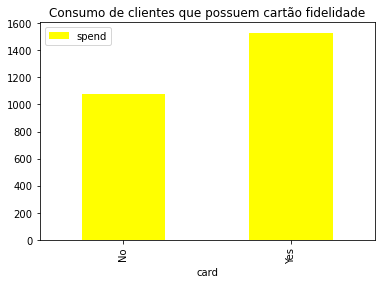

In [18]:
card_spend = db[['card','spend']].groupby('card').sum()
card_spend.plot.bar(color = ['yellow'])
plt.title('Consumo de clientes que possuem cartão fidelidade')
plt.show()

In [20]:
#Numero de clientes que possuem o Starbucks card
display(db['card'].value_counts())
display(db['card'].value_counts(normalize=True).map('{:.1%}'.format))

No     62
Yes    60
Name: card, dtype: int64

No     50.8%
Yes    49.2%
Name: card, dtype: object

<b> Como você conheceu o Starbucks?

In [129]:
media =db['media'].value_counts())
display(media)


Social Media                                                                                                                                   31
Social Media;Through friends and word of mouth                                                                                                 14
Through friends and word of mouth                                                                                                               9
Starbucks Website/Apps;Social Media                                                                                                             9
In Store displays                                                                                                                               7
Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth                                                                    6
Starbucks Website/Apps;Social Media;Through friends and word of mouth                                                       

<b> Você compraria de novo no Starbucks?

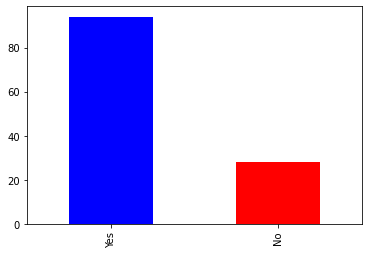

In [138]:
buy =db['buyer'].value_counts()
buy.plot.bar(color= ['blue','red'])
plt.show()

In [141]:
db.loc[(db['buyer'] == 'No')]

,time,sex,age,job,wage,oft,how,stay,dist,card,...,spend,quali,price,promo,place,wifi,rate,party,media,buyer
3,2019/10/01 12:39:08 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,2,1,4,3,3,3,3,Through friends and word of mouth,No
11,2019/10/01 12:48:26 PM GMT+8,Female,25,Student,20000,Rarely,Dine in,45,more than 3km,No,...,15,3,2,4,4,3,4,4,Starbucks Website/Apps;Social Media;Through fr...,No
14,2019/10/01 12:53:16 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,within 1km,Yes,...,15,5,2,5,5,5,5,2,Social Media;Through friends and word of mouth...,No
15,2019/10/01 12:57:31 PM GMT+8,Female,25,Employed,20000,Rarely,Take away,45,more than 3km,Yes,...,15,4,1,5,4,3,4,4,Starbucks Website/Apps,No
20,2019/10/01 1:13:45 PM GMT+8,Male,35,Employed,125000,Rarely,Take away,25,within 1km,Yes,...,30,2,2,5,3,3,4,3,Social Media;Emails,No
22,2019/10/01 1:21:50 PM GMT+8,Male,25,Employed,35000,Rarely,Dine in,190,within 1km,No,...,15,5,2,5,5,2,4,3,Through friends and word of mouth,No
26,2019/10/01 1:29:11 PM GMT+8,Male,35,Employed,160000,Rarely,Drive-thru,25,1km - 3km,No,...,15,4,2,4,4,4,4,2,Application offer,No
33,2019/10/01 1:45:43 PM GMT+8,Female,25,Employed,35000,Rarely,Dine in,45,1km - 3km,Yes,...,15,3,2,3,3,3,4,3,Social Media,No
35,2019/10/01 1:51:56 PM GMT+8,Female,25,Student,20000,Rarely,Take away,25,more than 3km,No,...,15,4,2,4,4,3,4,1,Social Media,No
51,2019/10/01 3:16:32 PM GMT+8,Female,16,Student,20000,Rarely,Dine in,25,more than 3km,No,...,15,3,3,2,2,2,4,3,Social Media;Through friends and word of mouth,No


<b>O que podemos Observar:

<i>
As caracteristicas dominantes dos consumidores que raramente frequentam as lojas e aqueles que não pretendem comprar novamente se assemelham.

*Média salarial de 20000
    
*Baixa qualidade de wifi
    
*preços não satisfatórios